# Prepare rules for the all the data sets 
## 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
## 2) Change the minimum length in apriori algorithm
## 3) Visulize the obtained rules using different plots 

In [14]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# conda install -c conda-forge mlxtend

In [4]:
!pip install mlxtend

# Question 1

In [5]:
book = pd.read_csv("book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [6]:
df=pd.get_dummies(book)
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [7]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [8]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [9]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [10]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


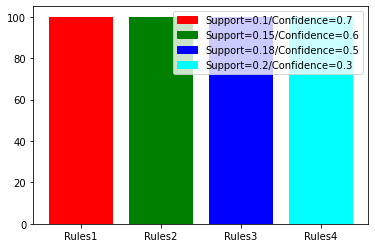

In [15]:
height = [len(rules),len(rules) ,len(rules) ,len(rules) ]
bars = ('Rules1', 'Rules2', 'Rules3', 'Rules4')
x_pos = np.arange(len(bars))
plt.bar(x_pos, height, color=[ 'red', 'green', 'blue', 'cyan'])

colors = {'Support=0.1/Confidence=0.7':'red', 'Support=0.15/Confidence=0.6':'green','Support=0.18/Confidence=0.5':'blue','Support=0.2/Confidence=0.3':'cyan'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.xticks(x_pos, bars)
plt.show()

# Question 2

In [12]:
movie = pd.read_csv("my_movies.csv")
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [13]:
df=pd.get_dummies(movie)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [14]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V1_Sixth Sense, V4_Green Mile, Sixth Sense, H..."
1393,0.1,"(LOTR2, V1_Sixth Sense, V4_Green Mile, Sixth S..."
1394,0.1,"(LOTR2, V1_Sixth Sense, V4_Green Mile, Sixth S..."
1395,0.1,"(LOTR2, V1_Sixth Sense, V4_Green Mile, Harry P..."


In [15]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(V3_Harry Potter1),"(LOTR2, V1_Sixth Sense, V4_Green Mile, Sixth S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(V5_LOTR2),"(LOTR2, V1_Sixth Sense, V4_Green Mile, Sixth S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(LOTR1),"(LOTR2, V1_Sixth Sense, V4_Green Mile, Sixth S...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(V2_LOTR1),"(LOTR2, V1_Sixth Sense, V4_Green Mile, Sixth S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [16]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(V5_LOTR2, LOTR2, V3_Harry Potter1, LOTR1)","(Green Mile, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(V2_LOTR1, V5_LOTR2, Harry Potter1)","(LOTR2, LOTR1, V4_Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(LOTR2, Harry Potter1, LOTR1)","(V2_LOTR1, V5_LOTR2, V4_Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V2_LOTR1, LOTR2, Harry Potter1)","(V5_LOTR2, LOTR1, V4_Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(LOTR2, V5_LOTR2, LOTR1)","(V2_LOTR1, Harry Potter1, V4_Green Mile, Sixth...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(V2_LOTR1, LOTR2, V5_LOTR2)","(Harry Potter1, LOTR1, V4_Green Mile, Sixth Se...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(V2_LOTR1, LOTR2, LOTR1)","(V5_LOTR2, Harry Potter1, V4_Green Mile, Sixth...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(Harry Potter1, V4_Green Mile, Sixth Sense)","(V2_LOTR1, LOTR2, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(V5_LOTR2, V4_Green Mile, Sixth Sense)","(V2_LOTR1, LOTR2, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(LOTR1, V4_Green Mile, Sixth Sense)","(V2_LOTR1, LOTR2, V5_LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [17]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64247,(V3_Harry Potter1),"(LOTR2, V1_Sixth Sense, V4_Green Mile, Sixth S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(V5_LOTR2),"(LOTR2, V1_Sixth Sense, V4_Green Mile, Sixth S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(LOTR1),"(LOTR2, V1_Sixth Sense, V4_Green Mile, Sixth S...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64250,(V2_LOTR1),"(LOTR2, V1_Sixth Sense, V4_Green Mile, Sixth S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


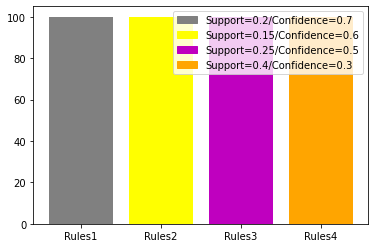

In [16]:
height = [len(rules),len(rules) ,len(rules) ,len(rules) ]
bars = ('Rules1', 'Rules2', 'Rules3', 'Rules4')
x_pos = np.arange(len(bars))
plt.bar(x_pos, height, color=[ 'gray', 'yellow', 'm', 'orange'])

colors = {'Support=0.2/Confidence=0.7':'gray', 'Support=0.15/Confidence=0.6':'yellow','Support=0.25/Confidence=0.5':'m','Support=0.4/Confidence=0.3':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.xticks(x_pos, bars)
plt.show()